## *Union de los CSVs y Creacion de un DataFrame Unificado*

*Librerias a Utilizar*

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:

def leer_csv_personalizado(ruta_archivo):
    # Leer el archivo línea por línea
    datos = []
    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            # Limpiar la línea y dividirla por el delimitador ';'
            partes = linea.strip().split(';')
             # Remover comas al final
            partes = [p.rstrip(',') for p in partes]
            datos.append(partes)
    

    df = pd.DataFrame(datos[1:], columns=datos[0])
    return df

df1 = leer_csv_personalizado(r'C:\Users\juanj\Desktop\ETL\DATA\amenities.csv')
df2 = leer_csv_personalizado(r'C:\Users\juanj\Desktop\ETL\DATA\geolocation.csv')
df3 = leer_csv_personalizado(r'C:\Users\juanj\Desktop\ETL\DATA\market_analysis_2019.csv')

df_unido = pd.concat([df1, df2, df3], axis=1)

df_unido.to_csv(r'C:\Users\juanj\Desktop\ETL\DATA\data_unida.csv', index=False)


## *Limpieza del DataFrame Unificado*

In [116]:
df_clean = pd.read_csv(r"C:\Users\juanj\Desktop\ETL\DATA\data_unida.csv")

C:\Users\juanj\AppData\Local\Temp\ipykernel_17820\3566117086.py:1: DtypeWarning: Columns (9,10,12,13,16,17,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv(r"C:\Users\juanj\Desktop\ETL\DATA\data_unida.csv")


*Eliminación de Columnas Innecesarias y Datos Nulos*

In [117]:

df_clean.drop(["ï»¿unified_id","ï»¿unified_id.1",
                "ï»¿unified_id.2","month","month.1",
                "month.2","latitude","longitude",
                "zipcode", "street_name"], axis=1, inplace=True)

df_clean.dropna(thresh=11, inplace=True) #Thresh es el parametro el cual dice que permite minimo 11 registros no nulos por fila

*Limpieza de Columnas*

In [118]:
#Pasar a Enteros Columnas Bedrooms, Bathrooms, Openness, Guests
df_clean['guests'] = df_clean['guests'].replace('15+', 15)
df_clean['guests'] = pd.to_numeric(df_clean['guests'])

df_clean['bathrooms'] = df_clean['bathrooms'].astype(int)

df_clean['bedrooms'] = df_clean['bedrooms'].astype(int)

df_clean['openness'] = df_clean['openness'].astype(int)

#Pasar a Flotante la Columnas Revenue, Occupancy, Nightly Rate, Lead Time, Lenght Stay
df_clean['revenue'] = df_clean['revenue'].str.replace(',','.')
df_clean['revenue'] = pd.to_numeric(df_clean['revenue'])

df_clean['occupancy'] = df_clean['occupancy'].str.replace(',','.')
df_clean['occupancy'] = pd.to_numeric(df_clean['occupancy'])

df_clean['nightly rate'] = df_clean['nightly rate'].str.replace(',','.')
df_clean['nightly rate'] = pd.to_numeric(df_clean['nightly rate'])

df_clean['lead time'] = df_clean['lead time'].str.replace(',','.')
df_clean['lead time'] = pd.to_numeric(df_clean['lead time'])

df_clean['length stay'] = df_clean['length stay'].str.replace(',','.')
df_clean['length stay'] = pd.to_numeric(df_clean['length stay'])

In [119]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23499 entries, 0 to 29927
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hot_tub       23499 non-null  int64  
 1   pool          23499 non-null  int64  
 2   city          23499 non-null  object 
 3   host_type     23499 non-null  object 
 4   bedrooms      23499 non-null  int32  
 5   bathrooms     23499 non-null  int32  
 6   guests        23499 non-null  int64  
 7   revenue       23491 non-null  float64
 8   openness      23499 non-null  int32  
 9   occupancy     23499 non-null  float64
 10  nightly rate  23486 non-null  float64
 11  lead time     21897 non-null  float64
 12  length stay   21897 non-null  float64
dtypes: float64(5), int32(3), int64(3), object(2)
memory usage: 2.2+ MB


In [120]:
# Calcular el procentaje de NAs por columna
porcentaje_nulos = df_clean.isnull().mean() * 100
print(porcentaje_nulos)

hot_tub         0.000000
pool            0.000000
city            0.000000
host_type       0.000000
bedrooms        0.000000
bathrooms       0.000000
guests          0.000000
revenue         0.034044
openness        0.000000
occupancy       0.000000
nightly rate    0.055322
lead time       6.817311
length stay     6.817311
dtype: float64


*Imputación de NAs*

In [121]:
# Media Para variables Cuantitativas
df_clean['length stay'] = df_clean['length stay'].fillna(df_clean['length stay'].mean())
df_clean['lead time'] = df_clean['lead time'].fillna(df_clean['lead time'].mean())
df_clean['revenue'] = df_clean['revenue'].fillna(df_clean['revenue'].mean())
df_clean['nightly rate'] = df_clean['nightly rate'].fillna(df_clean['nightly rate'].mean())
mean_value = df_clean['nightly rate'].mean()
df_clean['nightly rate'] = df_clean['nightly rate'].apply(lambda x: mean_value if x < 0 else x)



# Comprobar Imputación
porcentaje_nulos = df_clean.isnull().mean() * 100

print(porcentaje_nulos)

hot_tub         0.0
pool            0.0
city            0.0
host_type       0.0
bedrooms        0.0
bathrooms       0.0
guests          0.0
revenue         0.0
openness        0.0
occupancy       0.0
nightly rate    0.0
lead time       0.0
length stay     0.0
dtype: float64


*Manejo de Outliers*

In [122]:
# Identifica las columnas numéricas
cols_numericas = df_clean.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Aplica el método IQR para cada columna numérica
for col in cols_numericas:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ajusta los valores fuera de los límites inferior y superior
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])


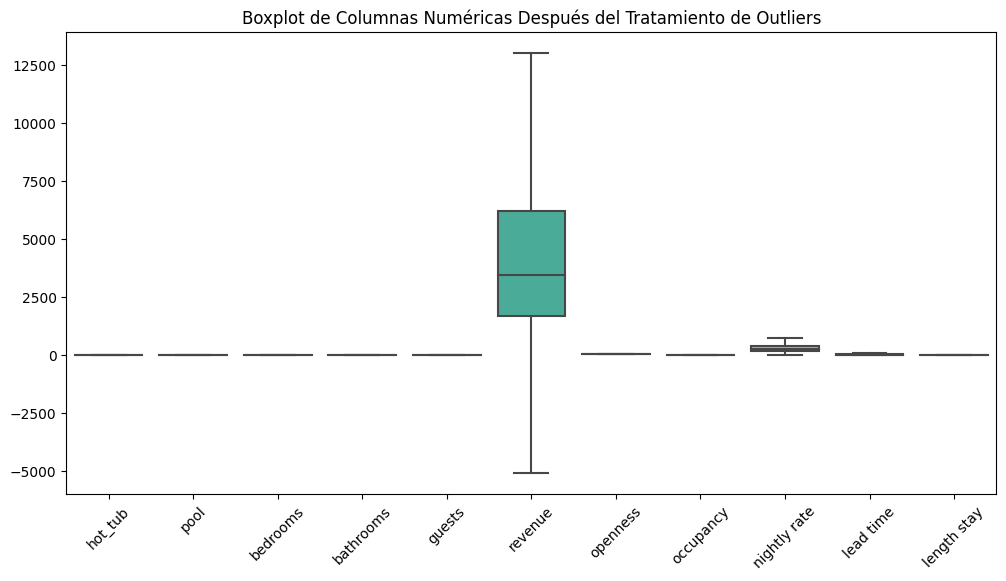

In [123]:
# Comprobar mediante un BoxPlot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[cols_numericas])
plt.title('Boxplot de Columnas Numéricas Después del Tratamiento de Outliers')
plt.xticks(rotation=45)
plt.show()


*Transformar en Nuevo CSV con Datos ya Procesados*

In [124]:
df_clean.to_csv(r'C:\Users\juanj\Desktop\ETL\DATA\clean_data.csv', index=False)

## *Analisis Exploratorio de Datos* 

In [134]:
df_final = pd.read_csv(r"C:\Users\juanj\Desktop\ETL\DATA\clean_data.csv")
df_final.describe()

,hot_tub,pool,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
count,23499.000000,23499.0,23499.000000,23499.000000,23499.000000,23499.000000,23499.000000,23499.000000,23499.000000,23499.000000,23499.000000
mean,0.531129,0.0,3.388697,2.292800,8.983255,4445.678111,30.269480,0.509639,308.386528,26.919041,2.481634
std,0.499041,0.0,0.614173,0.742731,2.582490,3552.873817,0.907813,0.292410,181.175437,23.725861,1.214409
min,0.000000,0.0,3.000000,1.000000,3.000000,-5097.009946,28.500000,0.032258,0.649999,1.000000,1.000000
25%,0.000000,0.0,3.000000,2.000000,7.000000,1689.829975,30.000000,0.266667,174.469582,7.500000,1.600000
50%,1.000000,0.0,3.000000,2.000000,8.000000,3466.600021,31.000000,0.483871,250.468750,20.800000,2.125000
75%,1.000000,0.0,4.000000,3.000000,10.000000,6214.389923,31.000000,0.741935,399.757955,37.133929,3.000000
max,1.000000,0.0,5.000000,4.500000,14.500000,13001.229844,31.000000,1.000000,737.690515,81.584821,5.100000


In [135]:
df_final["pool"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23494    0.0
23495    0.0
23496    0.0
23497    0.0
23498    0.0
Name: pool, Length: 23499, dtype: float64

*Descartar Columna Pool ya que no aporta nada al analisis*

In [136]:
df_final = df_final.drop('pool', axis=1)

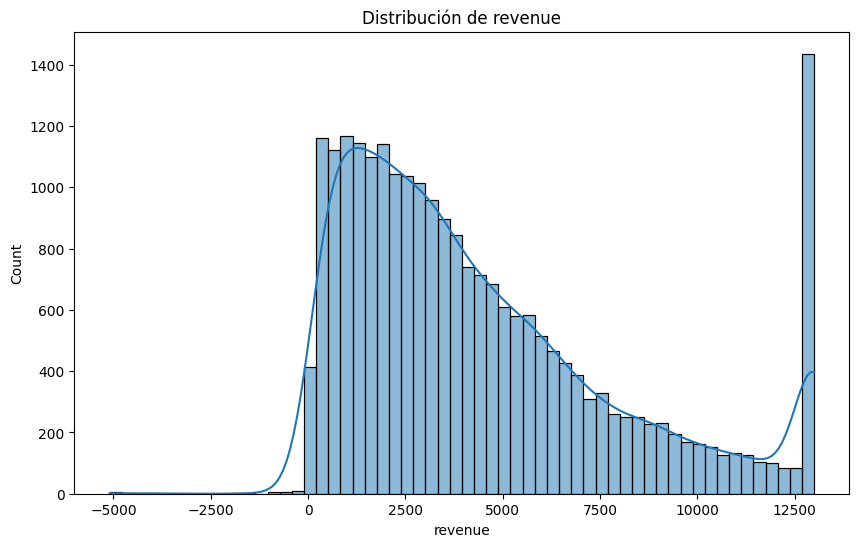

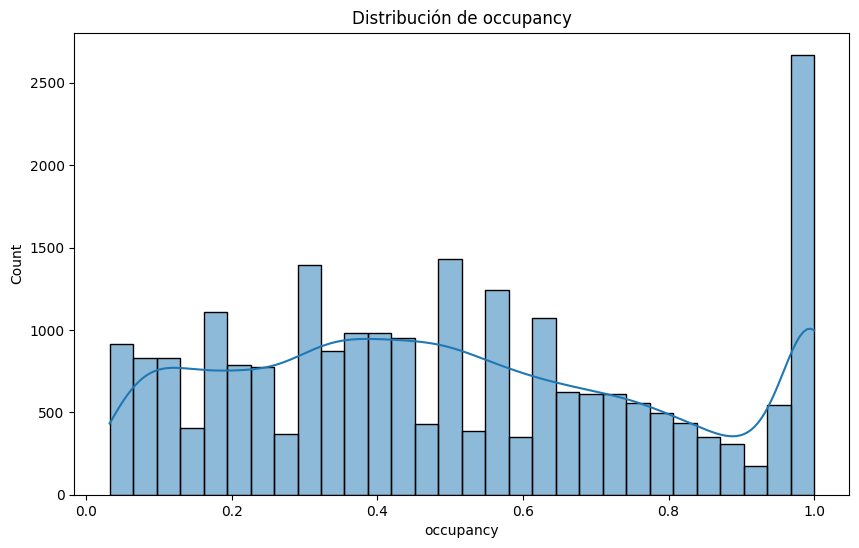

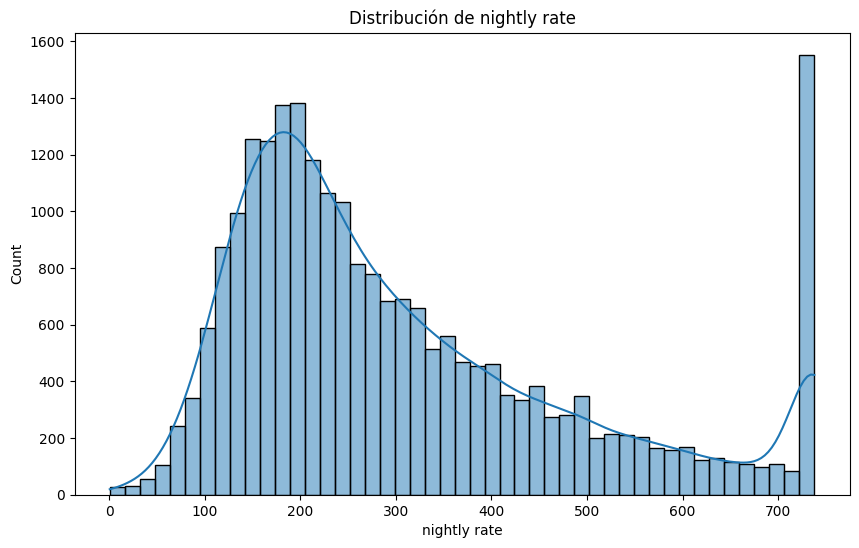

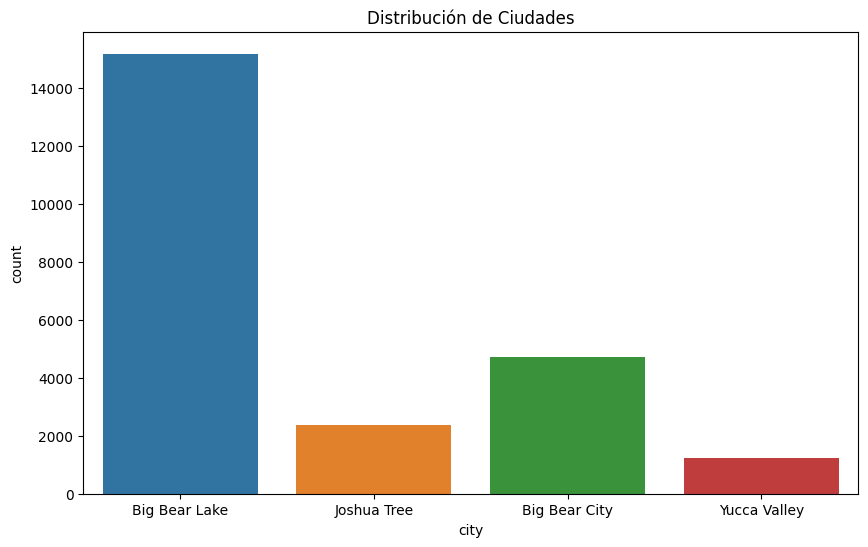

In [137]:

# Para variables numéricas
for col in ['revenue', 'occupancy', 'nightly rate']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_final[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Para variables categóricas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='city')
plt.title('Distribución de Ciudades')
plt.show()



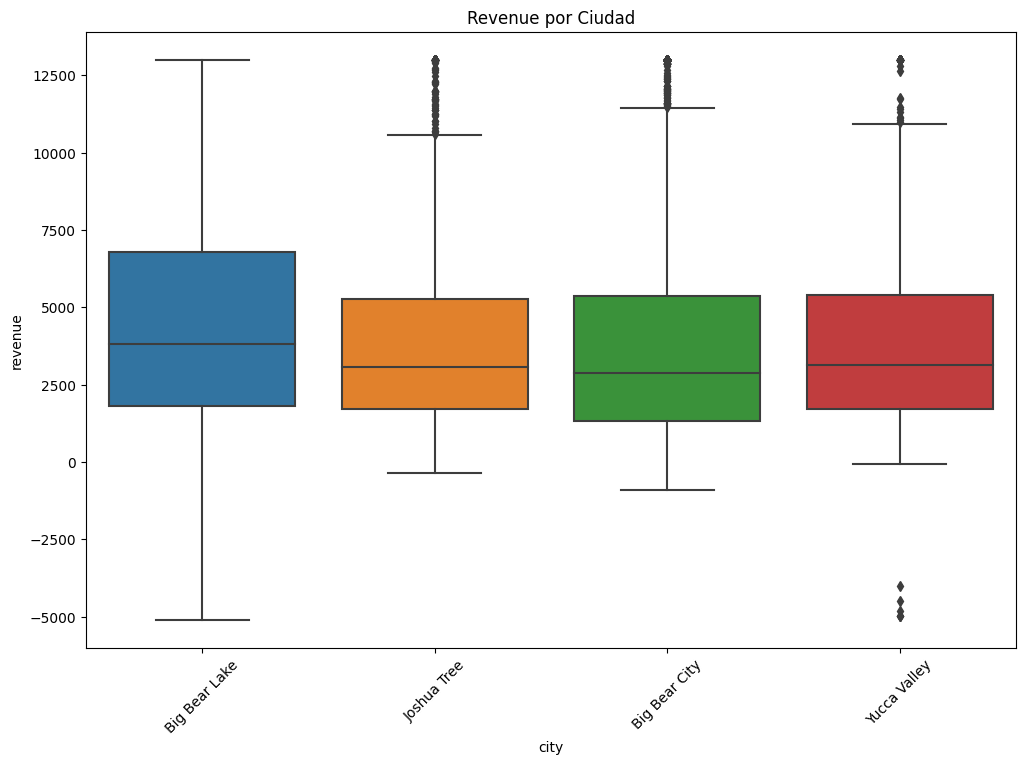

In [139]:
# Análisis de revenue por ciudad
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_final, x='city', y='revenue')
plt.xticks(rotation=45)
plt.title('Revenue por Ciudad')
plt.show()


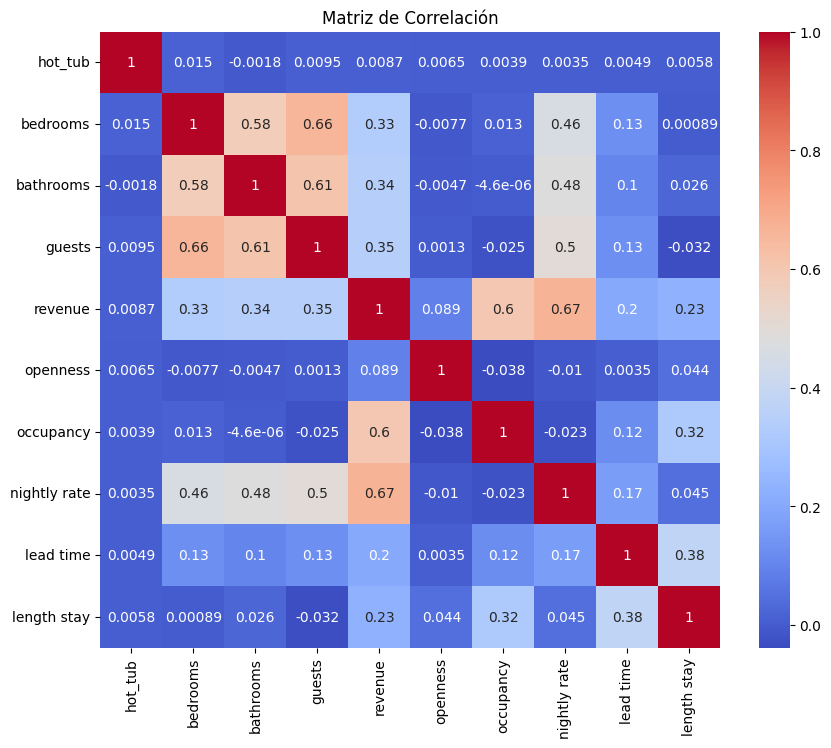

In [140]:
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])

# Matriz de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()